### Learning Exercise 2





Creation of visualizations are each worth 5 points. All other questions are 1 point each. It's possible to get partial-credit on the visualizations if you present work close to the best answer.

For all figures, make the font sizes larger for all text that look easy to read with the recommended figure size. I'd recommend `sns.set_context('talk')`.

You'll get docked/lose points if any of the following things exist with your submission:

- any tick-values are *not* perfectly horizontal, so they can be easily read from left to right
- wrong file type submission
- No text on visualizations chained with underscores
- incorrect naming of file
- blank lines in code blocks
- multiple visualizations for an answer when I only ask for one
- repeated imports of modules
- excess output like printing a dataframe or extra matplotlib text; get my attention during this exercise if you're struggling to fix it
- incorrect or nonsensical names of axes, legends, titles, etc
- correct units of measurements for all axes labels if needed. For example, if you plot the age of people, express it as age in years, days, seconds or the correct unit; it is not sufficient to simply write age.
- one character spacing between arguments in a method call. Acceptable: `sns.boxplot(x="day", y="total_bill", data=tips)`. Unacceptable: `sns.boxplot(x="day",y="total_bill",data=tips)`

#### Import Modules

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

#### Start Analysis

In [11]:
df = pd.read_csv('201805-fordgobike-trip-data.csv')

#### 1. Make A Bar Graph of the Count of Rides for Each Day of May 2018.

- You can use Seaborn, Matplotlib or Pandas Plot
- Figure must be 16 inches wide by 10 inches in height
- Vertical bar graph
- x-axis is days (do not show month or year value)
- y-axis is count of rides
- x-axis days must be in sequential order from 1 to 31

Hints:
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.dt.day.html
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.core.groupby.GroupBy.size.html or https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.Series.value_counts.html

Set visualization styles.

In [12]:
sns.set_context('talk')
sns.set_style("darkgrid")

Make new datetime column of rides' start time.

In [13]:
df['start_time_datetime'] = pd.to_datetime(df['start_time'])  

Make new column that just extracts the day value.

In [14]:
df['start_time_day'] = df['start_time_datetime'].dt.day

I show two ways below of building the visualization.

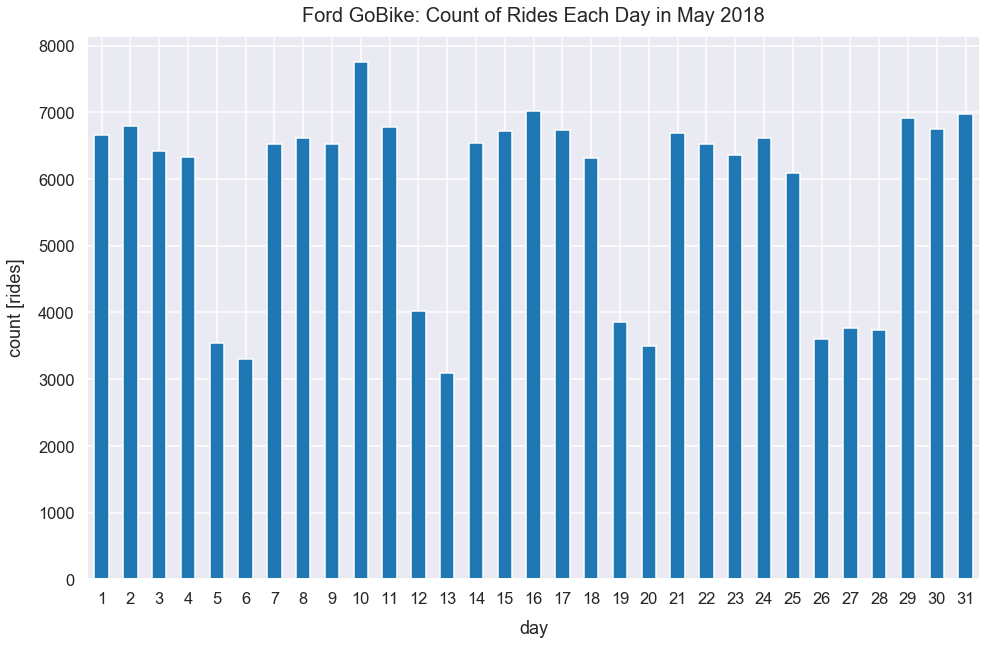

In [15]:
df['start_time_day'].value_counts(sort=False).plot(kind='bar', 
                                         figsize=(16, 10), 
                                         rot=0)
plt.ylabel("count [rides]", labelpad=13)
plt.xlabel("day", labelpad=13)
plt.title('Ford GoBike: Count of Rides Each Day in May 2018', y=1.015, fontsize=20);

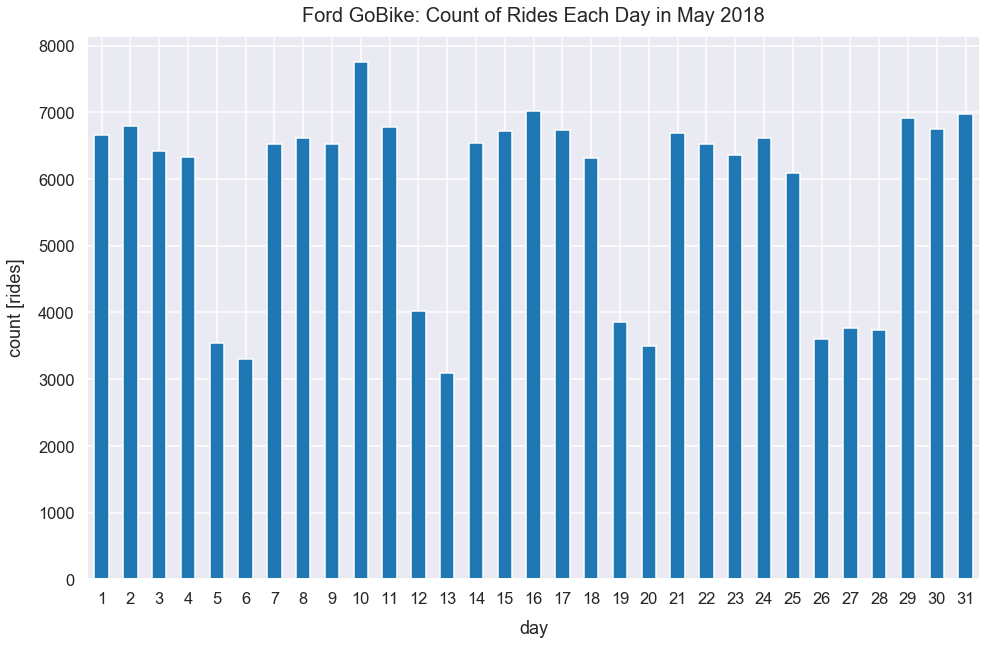

In [16]:
df.groupby('start_time_day').size().plot(kind='bar', 
                                         figsize=(16, 10), 
                                         rot=0)
plt.ylabel("count [rides]", labelpad=13)
plt.xlabel("day", labelpad=13)
plt.title('Ford GoBike: Count of Rides Each Day in May 2018', y=1.015, fontsize=20);

#### 2. Plot Count of Rides Per Day of Week

- You can use Seaborn, Matplotlib or Pandas Plot
- Figure must be 12 inches wide by 8 inches in height
- Vertical bar graph
- x-axis is weekday name
- y-axis is average count of rides
- x-axis ticks should be in sequential order of days from Monday to Sunday

Hints:
- https://pandas.pydata.org/pandas-docs/version/0.21.0/generated/pandas.Series.dt.weekday_name.html
- Pandas `pivot_table` method with the `aggfunc` set to `'count'` via https://chrisalbon.com/python/data_wrangling/pandas_pivot_tables/
- https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.reindex.html

In [17]:
df['weekday_name'] = df['start_time_datetime'].dt.weekday_name

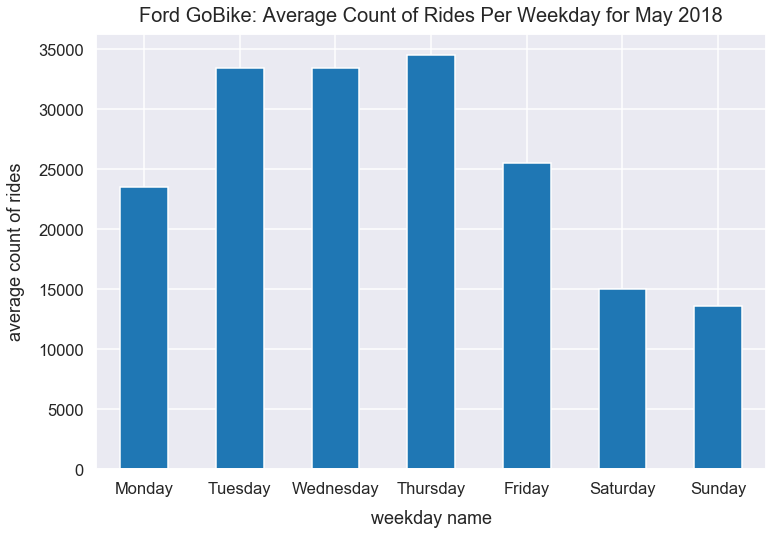

In [19]:
df.pivot_table(values='end_time', index='weekday_name', aggfunc='count').reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']).plot(kind='bar', figsize=(12, 8), rot=0)
plt.xlabel("weekday name", labelpad=13)
plt.ylabel("count of rides", labelpad=13)
plt.title("Ford GoBike: Average Count of Rides Per Weekday for May 2018", y=1.015, fontsize=20);

Imagine it's May 31, 2018...

#### 3. Make a Plot with 2 Lines to Mark the Count of Rides the Past 7 days Versus the Previous 7 days before that

- Figure size should be 12 inches wide by 10 inches in height
- You can use Seaborn, Matplotlib or Pandas Plot
- The prior week line should be a dashed line
- The current week should be a filled in line
- Each line must have a legend
- X-tick values can be the days of 25 - 31
- y values should be the count of rides each day
- Legend must mention each line

Hint:
- I made 3 lists with 2 lists as counts of rides and 1 of days
- I used pure Matplotlib to plot the 2 lines in two different Python statements. Consider `plt.plot(x_values, y_values)`
- If using Matplotlib, consider using the `linestyle` argument to get a dashed line: https://matplotlib.org/2.0.2/api/lines_api.html
- When I used Matplotlib, I just wrote `plt.legend(['This Week', 'Last Week'])` to generate the legend.

In [20]:
two_weeks_ago_counts = df[df['start_time_datetime']>datetime.date(2018, 5, 18)].groupby('start_time_day').size().values[0:7]
last_week_counts = df[df['start_time_datetime']>datetime.date(2018, 5, 18)].groupby('start_time_day').size().values[7:]
last_week_days = df[df['start_time_datetime']>datetime.date(2018, 5, 18)].groupby('start_time_day').size().index[7:]

In [ ]:
last_week_days = df[df['start_time_datetime']>datetime.date(2018, 5, 18)].groupby('start_time_day').size().index[7:]

In [25]:
last_week_days

Int64Index([25, 26, 27, 28, 29, 30, 31], dtype='int64', name='start_time_day')

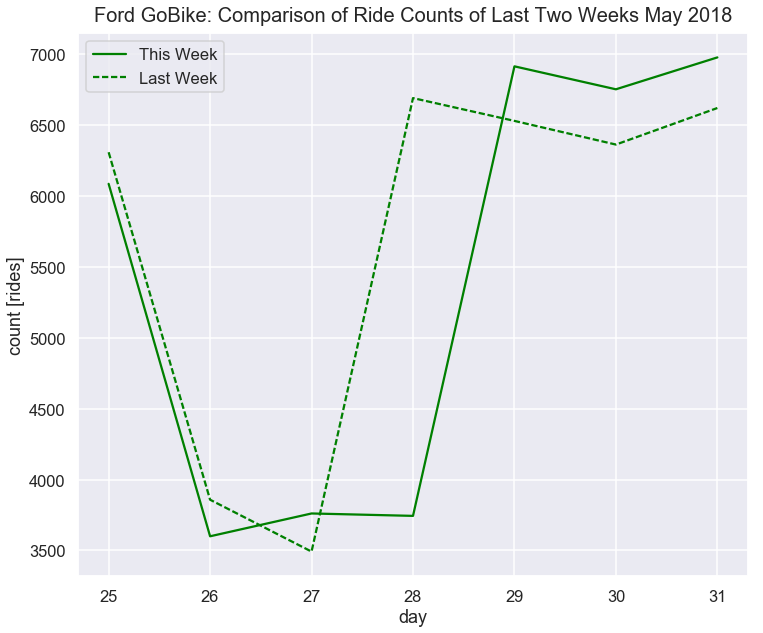

In [21]:
plt.figure(figsize=(12, 10))
plt.plot(last_week_days, last_week_counts, color='g')
plt.plot(last_week_days, two_weeks_ago_counts, color='g', linestyle='--')
plt.title("Ford GoBike: Comparison of Ride Counts of Last Two Weeks May 2018", y=1.01, fontsize=20)
plt.xlabel("day")
plt.ylabel('count [rides]')
plt.legend(['This Week', 'Last Week']);

#### 4. Make a Horizontal Bar Plot of Count of Rides from the Top 10 Docks

- Figure size should be 10 inches wide by 8 inches in height
- You can use Seaborn, Matplotlib or Pandas Plot
- Bars should be sorted from greatest to least with largest bar at the top
- Make sure there's enough spacing for your y-label from the tick values. Consider using the `labelpad` argument: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html

Hints:
- Consider using the Pandas `sort_values()` and `head()` or `tail()` method.

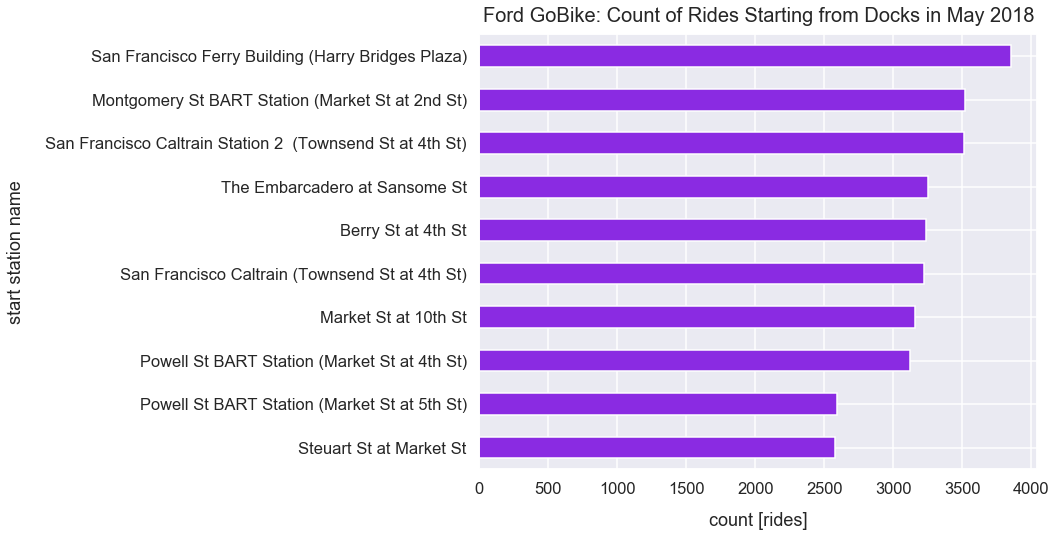

In [22]:
df.groupby('start_station_name').size().sort_values(ascending=True).tail(10).plot(kind='barh', 
                                                                                  color='blueviolet', 
                                                                                  figsize=(10, 8))                                                                          
plt.xlabel("count [rides]", labelpad=15)
plt.ylabel("start station name", labelpad=20)
plt.title("Ford GoBike: Count of Rides Starting from Docks in May 2018", y=1.015, fontsize=20);